# Sentimental classification of news headlines

In [106]:
#Importing all required libraries
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import datetime
import re 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#nltk.download('vader_lexicon')

### Data reading

In [133]:
#reading our csv file containing news headlines
df=pd.read_csv(r"C:\Users\Rakshu\Downloads\india-news-headlines.csv.zip",encoding="ISO-8859-1",parse_dates=['publish_date'])
df.drop('headline_category', inplace=True, axis=1)
df

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic
...,...,...
3424062,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,Govt extends deadline for use of FASTag till F...


In [138]:
print("Enter dates between which you wish to analyse the data in YYYY-MM-DD format")
datestart=input("Enter starting date: ")
startdate=datetime.datetime.strptime(datestart,"%Y-%m-%d")
dateend=input("Enter ending date: ")
enddate=datetime.datetime.strptime(dateend,"%Y-%m-%d")

Enter dates between which you wish to analyse the data in YYYY-MM-DD format
Enter starting date: 2019-01-01
Enter ending date: 2019-12-31


In [139]:
#Filtering the data of csv file
df.drop(df.index[(df['publish_date']<startdate)|(df['publish_date']>enddate)],axis=0,inplace=True)
df=df.set_index('publish_date')
df

,headline_text
publish_date,
2019-01-01,are you guilty of making these fashion faux pas
2019-01-01,Happy New Year 2020: How to get rid of a hango...
2019-01-01,Happy New Year Card Ideas 2020: Checkout these...
2019-01-01,happy new year 2019 images cards gifs pictures...
2019-01-01,Building teams with thumping African music
...,...
2019-12-31,No relief from cold; two killed in road accide...
2019-12-31,Hyderabad man dies at EDM fest; third death in...
2019-12-31,A trip to a tribal village with super cop Vija...


### Data cleaning and pre-processing

In [140]:
#creating new column to store cleaned data
df["new_headline"]=df["headline_text"]

In [141]:
#converting all data to lower case
df['new_headline']=df['new_headline'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [142]:
#removing all special characters
df['new_headline']=df['new_headline'].str.replace('[^\w\s]','',regex=True)

In [143]:
#removing stopwords
stop=stopwords.words('english')
df["new_headline"]=df["new_headline"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [144]:
#removing numeric digits
def removenum(text):
    result=re.sub(r'\d+', '', text)
    return result

df['new_headline']=df['new_headline'].apply(removenum)

In [145]:
#lemmatization of data
lemmatizer=WordNetLemmatizer()

def lemm(text):
    word_list=nltk.word_tokenize(text)
    lemm_output=' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemm_output

df['new_headline']=df['new_headline'].apply(lemm, convert_dtype=True, args=())

In [146]:
df

,headline_text,new_headline
publish_date,,
2019-01-01,are you guilty of making these fashion faux pas,guilty making fashion faux pa
2019-01-01,Happy New Year 2020: How to get rid of a hango...,happy new year get rid hangover new year party
2019-01-01,Happy New Year Card Ideas 2020: Checkout these...,happy new year card idea checkout outstanding ...
2019-01-01,happy new year 2019 images cards gifs pictures...,happy new year image card gifs picture quote w...
2019-01-01,Building teams with thumping African music,building team thumping african music
...,...,...
2019-12-31,No relief from cold; two killed in road accide...,relief cold two killed road accident due fog f...
2019-12-31,Hyderabad man dies at EDM fest; third death in...,hyderabad man dy edm fest third death three day
2019-12-31,A trip to a tribal village with super cop Vija...,trip tribal village super cop vijayan memorable


### Sentiment analysis

In [147]:
#calculating polarity score
senti=SentimentIntensityAnalyzer()
def getscore(review):
    cs=senti.polarity_scores(review)['compound']
    return cs

In [148]:
#new column to store polarity score
df['score']=df['new_headline'].apply(getscore)

In [149]:
#finding the sentiment attached to the score
def getsentiment(score):
    if score>0:
        return 'Positive'
    elif score<0:
        return 'Negative'
    else:
        return 'Neutral'

In [150]:
#new column to store the sentiment(positive/negative/neutral)
df['sentiment']=df['score'].apply(getsentiment)

In [151]:
df

,headline_text,new_headline,score,sentiment
publish_date,,,,
2019-01-01,are you guilty of making these fashion faux pas,guilty making fashion faux pa,-0.4215,Negative
2019-01-01,Happy New Year 2020: How to get rid of a hango...,happy new year get rid hangover new year party,0.7506,Positive
2019-01-01,Happy New Year Card Ideas 2020: Checkout these...,happy new year card idea checkout outstanding ...,0.8834,Positive
2019-01-01,happy new year 2019 images cards gifs pictures...,happy new year image card gifs picture quote w...,0.8402,Positive
2019-01-01,Building teams with thumping African music,building team thumping african music,0.0000,Neutral
...,...,...,...,...
2019-12-31,No relief from cold; two killed in road accide...,relief cold two killed road accident due fog f...,-0.6705,Negative
2019-12-31,Hyderabad man dies at EDM fest; third death in...,hyderabad man dy edm fest third death three day,-0.5994,Negative
2019-12-31,A trip to a tribal village with super cop Vija...,trip tribal village super cop vijayan memorable,0.5994,Positive


In [152]:
#counting total number of positive,negative or neutral data
tb_counts = df['sentiment'].value_counts()
tb_counts

Neutral     78682
Negative    61672
Positive    41790
Name: sentiment, dtype: int64

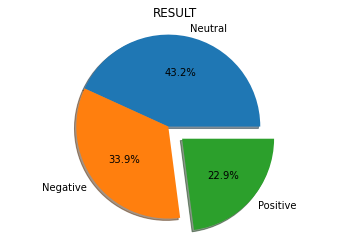

In [153]:
#plotting a pie-chart showing percentage of positive,negative or neutral data 
%matplotlib inline
explode=(0,0,0.2)
plt.pie(tb_counts.values, labels=tb_counts.index,explode=explode,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('RESULT')
plt.show()

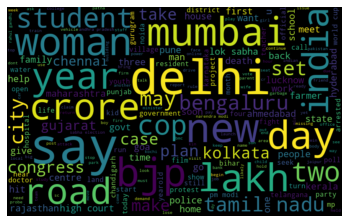

In [154]:
#Plotting our Wordcloud
allWords=' '.join( [text for text in df['new_headline']])
wordCloud=WordCloud(width=800, height=500, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud , interpolation = 'bilinear')
plt.axis('off')
plt.show()